<a href="https://colab.research.google.com/github/aliyusifov99/Hollywood-Theatrical-Market-Synopsis-1995-to-2021/blob/main/Hollywood_Theatrical_Market_Synopsis_1995_to_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the necesssary libraries

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

### Download the dataset

In [98]:
import wget
url='https://github.com/aliyusifov99/Hollywood-Theatrical-Market-Synopsis-1995-to-2021/blob/main/Datasets.zip'
wget.download(url)

'Datasets (3).zip'

In [99]:
# importing required modules
from zipfile import ZipFile
  
# specifying the zip file name
file_name = "Datasets.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

Extracting all the files now...
Done!


You can also download the datasets and upload it to your workspace(Google Colab, Jupyter Notebook etc.)

Link to the dataset:
https://www.kaggle.com/johnharshith/hollywood-theatrical-market-synopsis-1995-to-2021 

I will try to analyze each dataset seperately in this notebook

### Annual Ticket Sales analysis

In [100]:
AnnualTicketSales = pd.read_csv('Datasets/AnnualTicketSales.csv')

In [101]:
AnnualTicketSales.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,Unnamed: 5
0,2021,"42,37,74,881","$3,881,777,912","$3,881,777,912",$9.16,NaN
1,2020,"22,36,38,958","$2,048,534,616","$2,048,534,616",$9.16,NaN
2,2019,"1,22,85,41,629","$11,253,443,955","$11,253,444,050",$9.16,NaN
3,2018,"1,31,15,36,128","$11,948,096,650","$12,013,670,952",$9.11,NaN
4,2017,"1,22,56,39,761","$10,993,991,460","$11,226,860,216",$8.97,NaN


In [102]:
#The number of of null values
AnnualTicketSales.isnull().sum()

YEAR                                    0
TICKETS SOLD                            0
TOTAL BOX OFFICE                        0
TOTAL INFLATION ADJUSTED BOX OFFICE     0
AVERAGE TICKET PRICE                    0
Unnamed: 5                             27
dtype: int64

In [103]:
# Removing Unnecessay Unnamed: 5 column
AnnualTicketSales = AnnualTicketSales.drop('Unnamed: 5', axis=1)

In [104]:
AnnualTicketSales.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
0,2021,"42,37,74,881","$3,881,777,912","$3,881,777,912",$9.16
1,2020,"22,36,38,958","$2,048,534,616","$2,048,534,616",$9.16
2,2019,"1,22,85,41,629","$11,253,443,955","$11,253,444,050",$9.16
3,2018,"1,31,15,36,128","$11,948,096,650","$12,013,670,952",$9.11
4,2017,"1,22,56,39,761","$10,993,991,460","$11,226,860,216",$8.97


In [105]:
AnnualTicketSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   YEAR                                 27 non-null     int64 
 1   TICKETS SOLD                         27 non-null     object
 2   TOTAL BOX OFFICE                     27 non-null     object
 3   TOTAL INFLATION ADJUSTED BOX OFFICE  27 non-null     object
 4   AVERAGE TICKET PRICE                 27 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.2+ KB


As we see type of our some values are object. We need to convert them to integer and float first. 

In [106]:
#Converting TICKET SOLD from object to int
AnnualTicketSales['TICKETS SOLD']=AnnualTicketSales['TICKETS SOLD'].replace(',','', regex=True)
AnnualTicketSales['TICKETS SOLD']=pd.to_numeric(AnnualTicketSales['TICKETS SOLD'])

#Converting TOTAL BOX OFFICE from object to int
AnnualTicketSales['TOTAL BOX OFFICE']=AnnualTicketSales['TOTAL BOX OFFICE'].replace(',','', regex=True)
AnnualTicketSales['TOTAL BOX OFFICE']=AnnualTicketSales['TOTAL BOX OFFICE'].str.replace('$','', regex=True)
AnnualTicketSales['TOTAL BOX OFFICE']=pd.to_numeric(AnnualTicketSales['TOTAL BOX OFFICE'])

#Converting TOTAL INFLATION ADJUSTED BOX OFFICE from object to int
AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE']=AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'].replace(',','', regex=True)
AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE']=AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'].str.replace('$','', regex=True)
AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE']=pd.to_numeric(AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'])


#Converting AVERAGE TICKET PRICE from object to int
AnnualTicketSales['AVERAGE TICKET PRICE']=AnnualTicketSales['AVERAGE TICKET PRICE'].replace(',','', regex=True)
AnnualTicketSales['AVERAGE TICKET PRICE']=AnnualTicketSales['AVERAGE TICKET PRICE'].str.replace('$','', regex=True)
AnnualTicketSales['AVERAGE TICKET PRICE']=pd.to_numeric(AnnualTicketSales['AVERAGE TICKET PRICE'])


In [107]:
#Final DataFrame
AnnualTicketSales.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
0,2021,423774881,3881777912,3881777912,9.16
1,2020,223638958,2048534616,2048534616,9.16
2,2019,1228541629,11253443955,11253444050,9.16
3,2018,1311536128,11948096650,12013670952,9.11
4,2017,1225639761,10993991460,11226860216,8.97


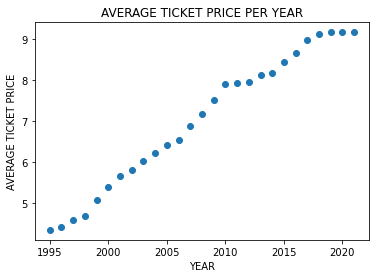

In [108]:
# Average Ticket Price change yearly
figure=plt.Figure()
plt.scatter(AnnualTicketSales['YEAR'], AnnualTicketSales['AVERAGE TICKET PRICE'])
plt.ylabel('AVERAGE TICKET PRICE')
plt.xlabel('YEAR')
plt.title('AVERAGE TICKET PRICE PER YEAR')
plt.show()

From scatter plot we can observe that Ticket Price has been increased from 3 dollar to around 10$ throughout these years.

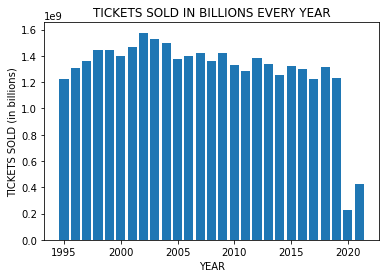

In [109]:
# Total tickets sold every year
plt.bar(AnnualTicketSales['YEAR'], AnnualTicketSales['TICKETS SOLD'])
plt.xlabel("YEAR")
plt.ylabel("TICKETS SOLD (in billions)")
plt.title("TICKETS SOLD IN BILLIONS EVERY YEAR")
plt.show()

From the barplot we can see that total tickets sold fro 1995 till 2020 did not change much. Only last 2 years we can observe the lowest values.

In [110]:
#Total Box Office and Inflation from 1995 to 2020
fig = go.Figure()

# Add graph object
fig.add_trace(go.Scatter(x=AnnualTicketSales['YEAR'],
                        y=AnnualTicketSales['TOTAL BOX OFFICE'],
                        mode='markers+lines',
                        name='TOTAL BOX OFFICE',
                        marker=dict(color='rgba(200, 148, 237,.7)')))

fig.add_trace(go.Scatter(x=AnnualTicketSales['YEAR'],
                        y=AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'],
                        mode='markers+lines',
                        name='TOTAL INFLATION ADJUSTED BOX OFFICE',
                        marker=dict(color='rgba(205, 210, 250,.7)')))

# Update layout
fig.update_layout(title='TOTAL BOX OFFICE AND INFLATION EACH YEAR',
                 yaxis=dict(showgrid=False, showline=True, linecolor='rgb(0,0,0)', title='USD'),
                 xaxis=dict(showgrid=False, showline=True, linecolor='rgb(0,0,0)', title='YEAR'),
                 paper_bgcolor='rgb(255,255,255)',
                 plot_bgcolor='rgb(255,255,255)',
                 hovermode='x unified')

# Add annotation with arrow
fig.add_annotation(x=AnnualTicketSales.iloc[AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'].argmax()].YEAR,
                    y=AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'][AnnualTicketSales.YEAR==AnnualTicketSales.iloc[AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'].argmax()].YEAR].values[0],
                    text='Highest TOTAL INFLATION BOX OFFICE')

fig.add_annotation(x=AnnualTicketSales.iloc[AnnualTicketSales['TOTAL BOX OFFICE'].argmax()].YEAR,
                    y=AnnualTicketSales['TOTAL BOX OFFICE'][AnnualTicketSales.YEAR==AnnualTicketSales.iloc[AnnualTicketSales['TOTAL BOX OFFICE'].argmax()].YEAR].values[0],
                    text='Highest TOTAL BOX OFFICE')
fig.show()

From the graph we can see that Highest total iflation box office happened in 2002,  however highest total box office was observed in 2018.

Now we can analyze the correlation between Ticket Price and other variables including 'TICKETS SOLD', 'TOTAL BOX OFFICE' and 'TOTAL BOX OFFICE ADJUSTED INFLATION'

In [111]:
#Correlation matrix
cormat=AnnualTicketSales.corr()
round(cormat,2)

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
YEAR,1.00,-0.55,0.30,-0.55,0.99
TICKETS SOLD,-0.55,1.00,0.62,1.00,-0.48
TOTAL BOX OFFICE,0.30,0.62,1.00,0.62,0.39
TOTAL INFLATION ADJUSTED BOX OFFICE,-0.55,1.00,0.62,1.00,-0.48
AVERAGE TICKET PRICE,0.99,-0.48,0.39,-0.48,1.00


From the values we can see that there the correlation between Average Ticket Price and other value are not that strong. Let's plot it!

<AxesSubplot:>

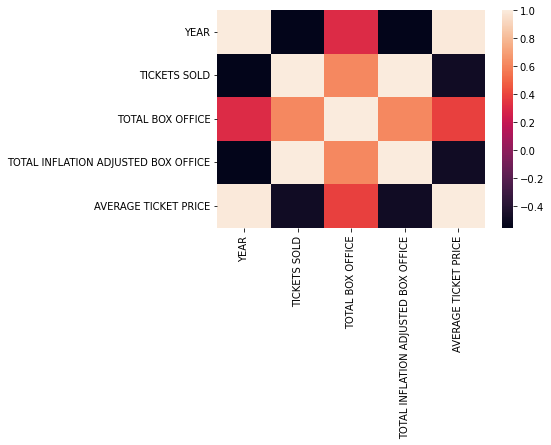

In [112]:
# plotting the correlation matrix 
sns.heatmap(cormat)

From this correlation graph we can observe that there is actually correlation. Now let's observe it in the plots.

Text(0.5, 0, 'TOTAL INFLATION ADJUSTED BOX OFFICE')

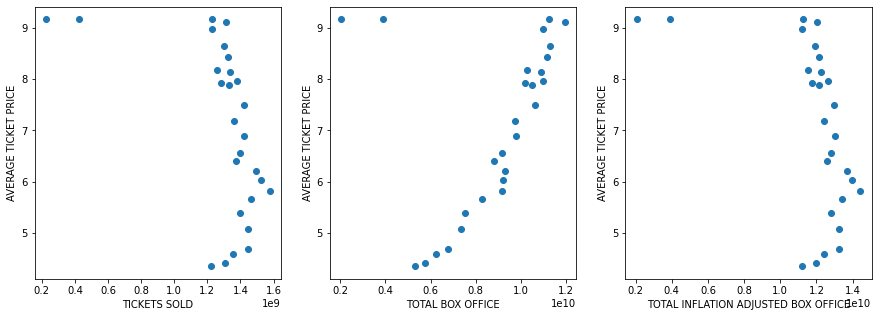

In [113]:
#plotting AVERAGE TICKET PRICE AND other variables in subplots to observe the correlation

plt_1=plt.figure(figsize=[15,5])
#plot 1
plt.subplot(1,3,1)
plt.scatter(y=AnnualTicketSales['AVERAGE TICKET PRICE'], x=AnnualTicketSales['TICKETS SOLD'])
plt.ylabel('AVERAGE TICKET PRICE')
plt.xlabel('TICKETS SOLD')

#plot 2
plt.subplot(1,3,2)
plt.scatter(y=AnnualTicketSales['AVERAGE TICKET PRICE'], x=AnnualTicketSales['TOTAL BOX OFFICE'])
plt.ylabel('AVERAGE TICKET PRICE')
plt.xlabel('TOTAL BOX OFFICE')

#plot 3
plt.subplot(1,3,3)
plt.scatter(y=AnnualTicketSales['AVERAGE TICKET PRICE'], x=AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'])
plt.ylabel('AVERAGE TICKET PRICE')
plt.xlabel('TOTAL INFLATION ADJUSTED BOX OFFICE')


If we remove the outliers we can see there is positive correlation on Total Box Office and somehow negative correlation with Tickets Sold and Inflation, but it is not strong. That is all from Annula Ticket Sales data.

### Highest Grossers  Analysis

In [114]:
HighestGrossers = pd.read_csv('Datasets/HighestGrossers.csv')

In [115]:
HighestGrossers.head()

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,"$184,031,112","$387,522,978","4,23,06,002"
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,"$306,169,255","$634,504,608","6,92,69,062"
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,"$250,650,052","$500,207,943","5,46,07,854"
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,"$443,319,081","$865,842,808","9,45,24,324"
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,"$430,443,350","$776,153,749","8,47,32,942"


In [116]:
## Data cleaning  for TOTAL FOR YEAR, TOTAL IN 2019 DOLLARS AND TICKETS SOLD columns
#Converting TICKETS SOLD from object to int
HighestGrossers['TICKETS SOLD']=HighestGrossers['TICKETS SOLD'].replace(',','', regex=True)
HighestGrossers['TICKETS SOLD']=pd.to_numeric(HighestGrossers['TICKETS SOLD'])

#Converting TOTAL FOR YEAR from object to int
HighestGrossers['TOTAL FOR YEAR']=HighestGrossers['TOTAL FOR YEAR'].replace(',','', regex=True)
HighestGrossers['TOTAL FOR YEAR']=HighestGrossers['TOTAL FOR YEAR'].str.replace('$','', regex=True)
HighestGrossers['TOTAL FOR YEAR']=pd.to_numeric(HighestGrossers['TOTAL FOR YEAR'])

#Converting TOTAL IN 2019 DOLLARS from object to int
HighestGrossers['TOTAL IN 2019 DOLLARS']=HighestGrossers['TOTAL IN 2019 DOLLARS'].replace(',','', regex=True)
HighestGrossers['TOTAL IN 2019 DOLLARS']=HighestGrossers['TOTAL IN 2019 DOLLARS'].str.replace('$','', regex=True)
HighestGrossers['TOTAL IN 2019 DOLLARS']=pd.to_numeric(HighestGrossers['TOTAL IN 2019 DOLLARS'])


In [117]:
HighestGrossers.head()

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,184031112,387522978,42306002
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,306169255,634504608,69269062
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,250650052,500207943,54607854
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,443319081,865842808,94524324
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,430443350,776153749,84732942


In [118]:
HighestGrossers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   YEAR                   27 non-null     int64 
 1   MOVIE                  27 non-null     object
 2   GENRE                  24 non-null     object
 3   MPAA RATING            27 non-null     object
 4   DISTRIBUTOR            27 non-null     object
 5   TOTAL FOR YEAR         27 non-null     int64 
 6   TOTAL IN 2019 DOLLARS  27 non-null     int64 
 7   TICKETS SOLD           27 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 1.8+ KB


In [119]:
HighestGrossers.isnull().sum()

YEAR                     0
MOVIE                    0
GENRE                    3
MPAA RATING              0
DISTRIBUTOR              0
TOTAL FOR YEAR           0
TOTAL IN 2019 DOLLARS    0
TICKETS SOLD             0
dtype: int64

We can see that there are 3 null values in Genre column

#### Analyze for Distributors

In [120]:
# group by for distributors
group_by_distributor = HighestGrossers.groupby(['DISTRIBUTOR'], as_index=False).sum()
group_by_distributor=group_by_distributor.drop(labels='YEAR', axis=1)
group_by_distributor

,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
0,20th Century Fox,1116883182,1954071528,213326586
1,Dreamworks SKG,441226247,650826473,71050925
2,Paramount Pictures,845430951,1356955439,148139240
3,Sony Pictures,1195304585,1789160942,195323247
4,Universal,253367455,430583644,47006948
5,Walt Disney,6071822640,6777527993,739904802
6,Warner Bros.,1396448343,1991232438,217383454


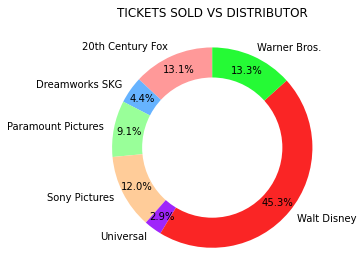

In [130]:
# Total Ticket Sold vs Distributor

#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#9F25FA', '#FA2525', '#25FA35']
 
plt.pie(group_by_distributor['TICKETS SOLD'], colors = colors, labels=group_by_distributor['DISTRIBUTOR'], autopct='%1.1f%%', startangle=90, pctdistance=0.85)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
# ax1.axis('equal') 
plt.title('TICKETS SOLD VS DISTRIBUTOR') 
plt.tight_layout()
plt.show()


From 1995 to 2020 we can observe that most tickets sold was for the movies distributed by Walt Disney. And the least one is Universal.

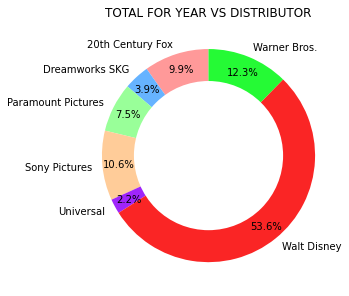

In [131]:
# Total For Year vs Distributor

#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#9F25FA', '#FA2525', '#25FA35']
 
plt.pie(group_by_distributor['TOTAL FOR YEAR'], colors = colors, labels=group_by_distributor['DISTRIBUTOR'], autopct='%1.1f%%', startangle=90, pctdistance=0.85)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
# ax1.axis('equal')  
plt.tight_layout()
plt.title('TOTAL FOR YEAR VS DISTRIBUTOR')
plt.show()


From the Pie chart for Total Income for the highest grossers from 1995 till 2020, we can observe that most income owned by Walt Disney with 53.6% of total Income.

Now let's group by the genres and analyze it

#### Analyze for Genre

In [132]:
group_by_genre = HighestGrossers.groupby(['GENRE'], as_index=False).sum()
group_by_genre=group_by_genre.drop(labels='YEAR', axis=1)
group_by_genre

,GENRE,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
0,Action,4447496795,5101959828,556982514
1,Adventure,5401937937,8173858097,892342587
2,Drama,184031112,387522978,42306002


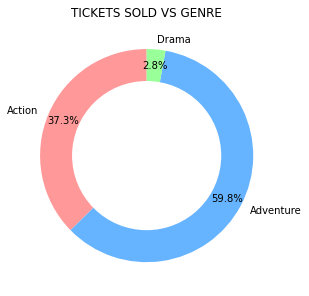

In [133]:
# TICKETS SOLD VS GENRE

#colors
colors = ['#ff9999','#66b3ff','#99ff99']
 
plt.pie(group_by_genre['TICKETS SOLD'], colors = colors, labels=group_by_genre['GENRE'], autopct='%1.1f%%', startangle=90, pctdistance=0.85)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
# ax1.axis('equal')  
plt.tight_layout()
plt.title('TICKETS SOLD VS GENRE')
plt.show()

We can see that the most ticket sold was belong tothe Adventure movies.

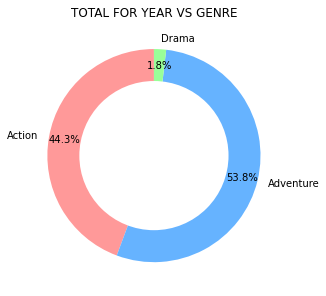

In [134]:
# TOTAL FOR YEAR VS GENRE

#colors
colors = ['#ff9999','#66b3ff','#99ff99']
 
plt.pie(group_by_genre['TOTAL FOR YEAR'], colors = colors, labels=group_by_genre['GENRE'], autopct='%1.1f%%', startangle=90, pctdistance=0.85)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
# ax1.axis('equal')  
plt.tight_layout()
plt.title('TOTAL FOR YEAR VS GENRE')
plt.show()

From the pie chart we can observe that total for year is the most for Adventure movies.

Now let's analyze for MPAA Rating

#### Analyze for MPAA rating

In [135]:
group_by_mpaa = HighestGrossers.groupby(['MPAA RATING'], as_index=False).sum()
group_by_mpaa=group_by_mpaa.drop(labels='YEAR', axis=1)
group_by_mpaa

,MPAA RATING,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
0,G,754719247,997855757,108936218
1,PG,1911737047,2858698078,312084943
2,PG-13,8449609254,10889386774,1188797682
3,R,204417855,204417848,22316359


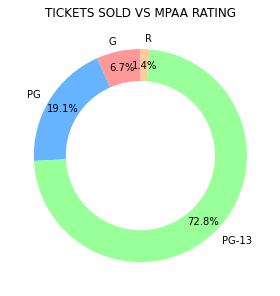

In [137]:
# TICKETS SOLD VS MPAA RATING

#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
 
plt.pie(group_by_mpaa['TICKETS SOLD'], colors = colors, labels=group_by_mpaa['MPAA RATING'], autopct='%1.1f%%', startangle=90, pctdistance=0.85)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
# ax1.axis('equal')  
plt.tight_layout()
plt.title('TICKETS SOLD VS MPAA RATING')
plt.show()

From the Pie chart we can see that  the most tickets sold belong to  PG-13 category movies.

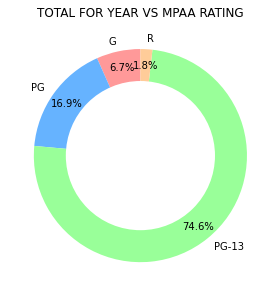

In [139]:
# TOTAL FOR YEAR VS MPAA RATING

#colors
colors = ['#ff9999','#66b3ff','#99ff99', '#ffcc99']
 
plt.pie(group_by_mpaa['TOTAL FOR YEAR'], colors = colors, labels=group_by_mpaa['MPAA RATING'], autopct='%1.1f%%', startangle=90, pctdistance=0.85)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
# ax1.axis('equal')  
plt.tight_layout()
plt.title('TOTAL FOR YEAR VS MPAA RATING')
plt.show()

As it is obvious from the previous pie chart, we can say that the most total income came from PG-13 movies. 

In [140]:
HighestGrossers

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,184031112,387522978,42306002
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,306169255,634504608,69269062
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,250650052,500207943,54607854
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,443319081,865842808,94524324
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,430443350,776153749,84732942
5,2000,How the Grinch Stole Christmas,Adventure,PG,Universal,253367455,430583644,47006948
6,2001,Harry Potter and the Sorcerer’s Stone,Adventure,PG,Warner Bros.,300404434,486166890,53074988
7,2002,Spider-Man,Adventure,PG-13,Sony Pictures,403706375,636480273,69484746
8,2003,Finding Nemo,Adventure,G,Walt Disney,339714367,516050346,56337374
9,2004,Shrek 2,Adventure,PG,Dreamworks SKG,441226247,650826473,71050925


We can check 10 movies with highest number of tickets sold from 1995 till 2021.

#### Top 10 and Least 10 movies based on Tickets Sold

In [141]:
top_10_movies = HighestGrossers.nlargest(n=10, columns=['TICKETS SOLD'])
top_10_movies

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,443319081,865842808,94524324
24,2019,Avengers: Endgame,NaN,PG-13,Walt Disney,858373000,858373002,93708843
20,2015,Star Wars Ep. VII: The Force Awakens,Action,PG-13,Walt Disney,742208942,806480887,88043765
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,430443350,776153749,84732942
17,2012,The Avengers,Adventure,PG-13,Walt Disney,623357910,717331462,78311295
23,2018,Black Panther,Action,PG-13,Walt Disney,700059566,703901821,76845177
13,2008,The Dark Knight,Adventure,PG-13,Warner Bros.,531001578,677433772,73955652
9,2004,Shrek 2,Adventure,PG,Dreamworks SKG,441226247,650826473,71050925
7,2002,Spider-Man,Adventure,PG-13,Sony Pictures,403706375,636480273,69484746
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,306169255,634504608,69269062


Let's visualize the tickets sold by the top 10 movies.

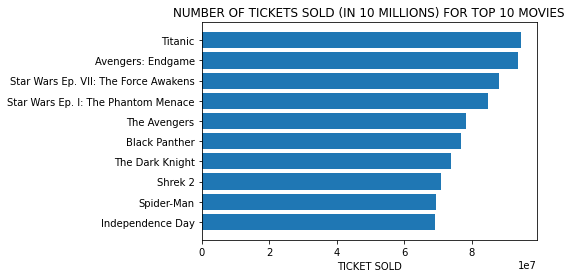

In [142]:
# bar plot 
fig, ax = plt.subplots()
ax.barh(top_10_movies['MOVIE'], top_10_movies['TICKETS SOLD'], align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('TICKET SOLD')
ax.set_title('NUMBER OF TICKETS SOLD (IN 10 MILLIONS) FOR TOP 10 MOVIES')

plt.show()

In [143]:
least_10_movies = HighestGrossers.nsmallest(n=10, columns=['TICKETS SOLD'])
least_10_movies

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
25,2020,Bad Boys For Life,NaN,R,Sony Pictures,204417855,204417848,22316359
26,2021,Shang-Chi and the Legend of the Ten Rings,NaN,PG-13,Walt Disney,224226704,224226704,24478897
19,2014,Guardians of the Galaxy,Adventure,PG-13,Walt Disney,333055258,373413235,40765637
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,184031112,387522978,42306002
5,2000,How the Grinch Stole Christmas,Adventure,PG,Universal,253367455,430583644,47006948
16,2011,Harry Potter and the Deathly Hallows: Part II,Action,PG-13,Warner Bros.,381011219,440108798,48046812
12,2007,Spider-Man 3,Adventure,PG-13,Sony Pictures,336530303,448054878,48914288
18,2013,Iron Man 3,Adventure,PG-13,Walt Disney,408992272,460808016,50306552
15,2010,Toy Story 3,Action,G,Walt Disney,415004880,481805411,52598844
6,2001,Harry Potter and the Sorcerer’s Stone,Adventure,PG,Warner Bros.,300404434,486166890,53074988


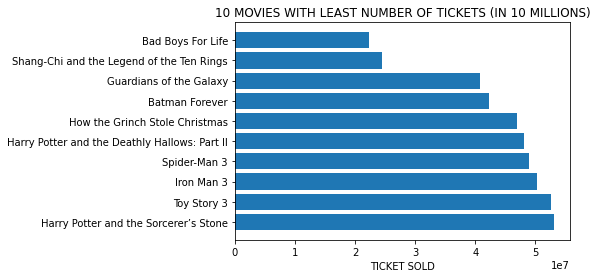

In [144]:
# bar plot 
fig, ax = plt.subplots()
ax.barh(least_10_movies['MOVIE'], least_10_movies['TICKETS SOLD'], align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('TICKET SOLD')
ax.set_title('10 MOVIES WITH LEAST NUMBER OF TICKETS (IN 10 MILLIONS)')

plt.show()

### Popular Creative Types Analysis

In [145]:
PopularCreativeTypes = pd.read_csv('Datasets/PopularCreativeTypes.csv')
PopularCreativeTypes

,RANK,CREATIVE TYPES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1.0,Contemporary Fiction,"7,442","$96,203,727,036","$12,927,133",40.46%
1,2.0,Kids Fiction,564,"$32,035,539,746","$56,800,602",13.47%
2,3.0,Science Fiction,724,"$29,922,660,857","$41,329,642",12.59%
3,4.0,Fantasy,759,"$21,724,062,575","$28,621,953",9.14%
4,5.0,Super Hero,129,"$20,273,157,911","$157,156,263",8.53%
5,6.0,Historical Fiction,"1,487","$18,521,260,744","$12,455,454",7.79%
6,7.0,Dramatization,"1,175","$15,715,191,699","$13,374,631",6.61%
7,8.0,Factual,"2,467","$2,960,327,207","$1,199,970",1.25%
8,9.0,Multiple Creative Types,42,"$117,574,526","$2,799,393",0.05%
9,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
#drop null values
PopularCreativeTypes=PopularCreativeTypes.dropna()
PopularCreativeTypes

,RANK,CREATIVE TYPES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1.0,Contemporary Fiction,"7,442","$96,203,727,036","$12,927,133",40.46%
1,2.0,Kids Fiction,564,"$32,035,539,746","$56,800,602",13.47%
2,3.0,Science Fiction,724,"$29,922,660,857","$41,329,642",12.59%
3,4.0,Fantasy,759,"$21,724,062,575","$28,621,953",9.14%
4,5.0,Super Hero,129,"$20,273,157,911","$157,156,263",8.53%
5,6.0,Historical Fiction,"1,487","$18,521,260,744","$12,455,454",7.79%
6,7.0,Dramatization,"1,175","$15,715,191,699","$13,374,631",6.61%
7,8.0,Factual,"2,467","$2,960,327,207","$1,199,970",1.25%
8,9.0,Multiple Creative Types,42,"$117,574,526","$2,799,393",0.05%


In [147]:
PopularCreativeTypes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RANK            9 non-null      float64
 1   CREATIVE TYPES  9 non-null      object 
 2   MOVIES          9 non-null      object 
 3   TOTAL GROSS     9 non-null      object 
 4   AVERAGE GROSS   9 non-null      object 
 5   MARKET SHARE    9 non-null      object 
dtypes: float64(1), object(5)
memory usage: 504.0+ bytes


In [148]:
# data cleaning
#Converting MOVIES from object to int
PopularCreativeTypes['MOVIES']=PopularCreativeTypes['MOVIES'].replace(',','', regex=True)
PopularCreativeTypes['MOVIES']=pd.to_numeric(PopularCreativeTypes['MOVIES'])

#Converting TOTAL GROSS from object to float
PopularCreativeTypes['TOTAL GROSS']=PopularCreativeTypes['TOTAL GROSS'].replace(',','', regex=True)
PopularCreativeTypes['TOTAL GROSS']=PopularCreativeTypes['TOTAL GROSS'].str.replace('$','', regex=True)
PopularCreativeTypes['TOTAL GROSS']=pd.to_numeric(PopularCreativeTypes['TOTAL GROSS'])

#Converting AVERAGE GROSS from object to float
PopularCreativeTypes['AVERAGE GROSS']=PopularCreativeTypes['AVERAGE GROSS'].replace(',','', regex=True)
PopularCreativeTypes['AVERAGE GROSS']=PopularCreativeTypes['AVERAGE GROSS'].str.replace('$','', regex=True)
PopularCreativeTypes['AVERAGE GROSS']=pd.to_numeric(PopularCreativeTypes['AVERAGE GROSS'])

PopularCreativeTypes

/tmp/ipykernel_125/3044506155.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_125/3044506155.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_125/3044506155.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_125/304

,RANK,CREATIVE TYPES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1.0,Contemporary Fiction,7442,96203727036,12927133,40.46%
1,2.0,Kids Fiction,564,32035539746,56800602,13.47%
2,3.0,Science Fiction,724,29922660857,41329642,12.59%
3,4.0,Fantasy,759,21724062575,28621953,9.14%
4,5.0,Super Hero,129,20273157911,157156263,8.53%
5,6.0,Historical Fiction,1487,18521260744,12455454,7.79%
6,7.0,Dramatization,1175,15715191699,13374631,6.61%
7,8.0,Factual,2467,2960327207,1199970,1.25%
8,9.0,Multiple Creative Types,42,117574526,2799393,0.05%


In [149]:
PopularCreativeTypes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RANK            9 non-null      float64
 1   CREATIVE TYPES  9 non-null      object 
 2   MOVIES          9 non-null      int64  
 3   TOTAL GROSS     9 non-null      int64  
 4   AVERAGE GROSS   9 non-null      int64  
 5   MARKET SHARE    9 non-null      object 
dtypes: float64(1), int64(3), object(2)
memory usage: 504.0+ bytes


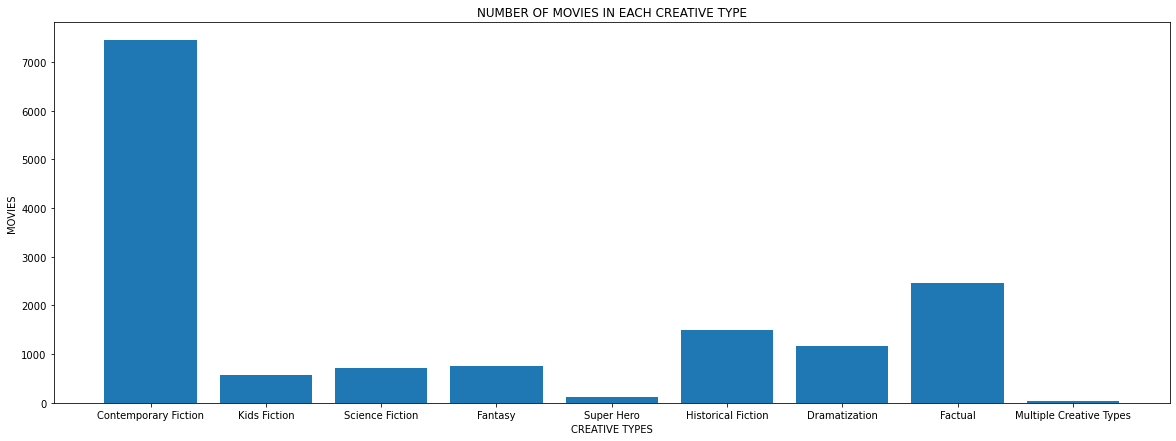

In [150]:
# Bar plot creative types and movies in each type
# Total tickets sold every year
figure=plt.figure(figsize=(20,7))
plt.bar(PopularCreativeTypes['CREATIVE TYPES'], PopularCreativeTypes['MOVIES'])
plt.xlabel("CREATIVE TYPES")
plt.ylabel("MOVIES")
plt.title("NUMBER OF MOVIES IN EACH CREATIVE TYPE")
plt.show()

From the bar plot we can observe that the most numbr of movies are from Contemporary Fiction section.

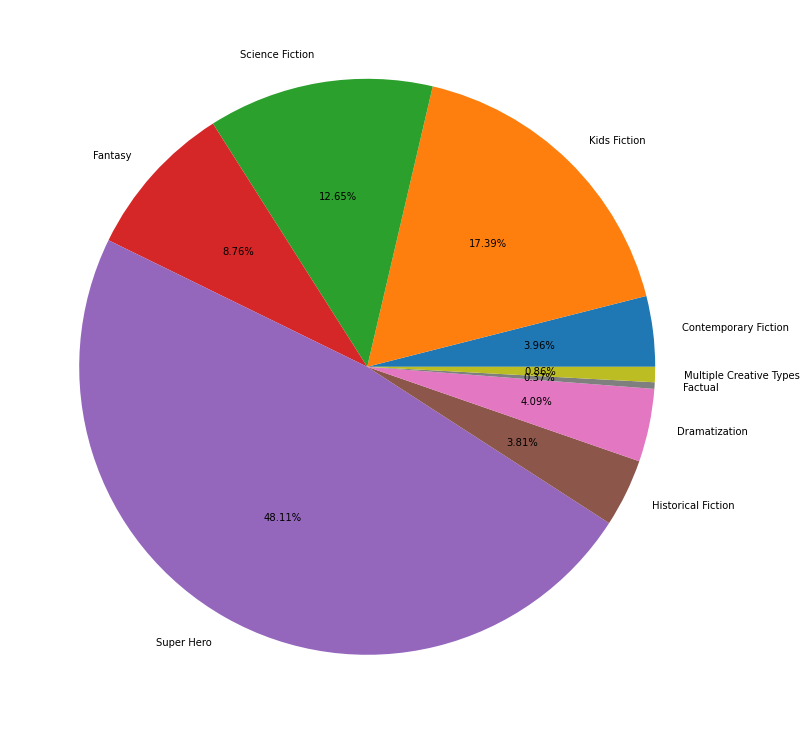

In [151]:
# Pie chart of Creative types and Average Gross
fig = plt.figure(figsize=[10,10])
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(PopularCreativeTypes['AVERAGE GROSS'], labels = PopularCreativeTypes['CREATIVE TYPES'],autopct='%1.2f%%')
plt.show()

### Top  Distributors

In [152]:
# importing the dataset
TopDistributors = pd.read_csv('Datasets/TopDistributors.csv')
TopDistributors

,RANK,DISTRIBUTORS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Walt Disney,588,"$40,472,424,278","$68,830,654",17.02%
1,2,Warner Bros.,824,"$36,269,425,479","$44,016,293",15.25%
2,3,Sony Pictures,747,"$29,113,002,302","$38,973,229",12.24%
3,4,Universal,535,"$28,089,932,569","$52,504,547",11.81%
4,5,20th Century Fox,525,"$25,857,839,756","$49,253,028",10.88%
5,6,Paramount Pictures,493,"$24,361,425,304","$49,414,656",10.25%
6,7,Lionsgate,426,"$9,631,837,781","$22,609,948",4.05%
7,8,New Line,209,"$6,195,268,024","$29,642,431",2.61%
8,9,Dreamworks SKG,77,"$4,278,649,271","$55,566,874",1.80%
9,10,Miramax,385,"$3,836,019,208","$9,963,686",1.61%


In [153]:
#data cleaning 

#Converting TOTAL GROSS from object to int
TopDistributors['TOTAL GROSS']=TopDistributors['TOTAL GROSS'].replace(',','', regex=True)
TopDistributors['TOTAL GROSS']=TopDistributors['TOTAL GROSS'].str.replace('$','', regex=True)
TopDistributors['TOTAL GROSS']=pd.to_numeric(TopDistributors['TOTAL GROSS'])

#Converting TOTAL INFLATION ADJUSTED BOX OFFICE from object to int
TopDistributors['AVERAGE GROSS']=TopDistributors['AVERAGE GROSS'].replace(',','', regex=True)
TopDistributors['AVERAGE GROSS']=TopDistributors['AVERAGE GROSS'].str.replace('$','', regex=True)
TopDistributors['AVERAGE GROSS']=pd.to_numeric(TopDistributors['AVERAGE GROSS'])

TopDistributors

,RANK,DISTRIBUTORS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Walt Disney,588,40472424278,68830654,17.02%
1,2,Warner Bros.,824,36269425479,44016293,15.25%
2,3,Sony Pictures,747,29113002302,38973229,12.24%
3,4,Universal,535,28089932569,52504547,11.81%
4,5,20th Century Fox,525,25857839756,49253028,10.88%
5,6,Paramount Pictures,493,24361425304,49414656,10.25%
6,7,Lionsgate,426,9631837781,22609948,4.05%
7,8,New Line,209,6195268024,29642431,2.61%
8,9,Dreamworks SKG,77,4278649271,55566874,1.80%
9,10,Miramax,385,3836019208,9963686,1.61%


Text(0.5, 6.800000000000011, 'DISTRIBUTORS')

<Figure size 360x720 with 0 Axes>

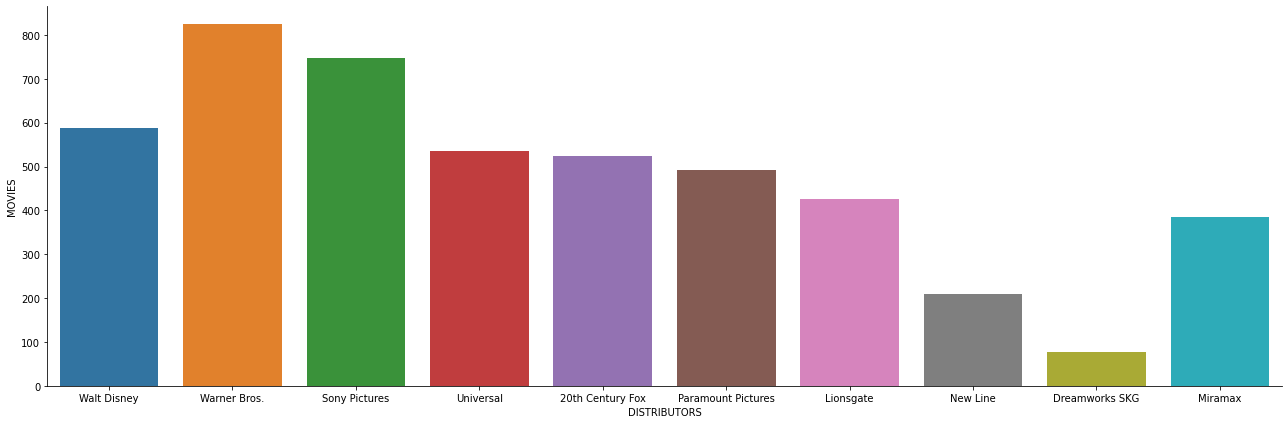

In [154]:
#Distributors vs Number of movies they released
fig=plt.figure(figsize=(5,10))
ax = sns.catplot(y='MOVIES', x='DISTRIBUTORS',kind='bar', data=TopDistributors, height=6, aspect=3)
plt.ylabel('MOVIES')
plt.xlabel('DISTRIBUTORS')

From this bar plot we can see that the top movie distributors were Warner Bros. and Sony Pictures

### Top Genres analysis

In [155]:
TopGenres = pd.read_csv('Datasets/TopGenres.csv')
TopGenres

,RANK,GENRES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Adventure,"1,102","$64,529,536,530","$58,556,748",27.14%
1,2,Action,"1,098","$49,339,974,493","$44,936,224",20.75%
2,3,Drama,"5,479","$35,586,177,269","$6,495,013",14.97%
3,4,Comedy,"2,418","$33,687,992,318","$13,932,172",14.17%
4,5,Thriller/Suspense,"1,186","$19,810,201,102","$16,703,374",8.33%
5,6,Horror,716,"$13,430,378,699","$18,757,512",5.65%
6,7,Romantic Comedy,630,"$10,480,124,374","$16,635,118",4.41%
7,8,Musical,201,"$4,293,988,317","$21,363,126",1.81%
8,9,Documentary,"2,415","$2,519,513,142","$1,043,277",1.06%
9,10,Black Comedy,213,"$2,185,433,323","$10,260,250",0.92%


In [156]:
TopGenres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RANK           10 non-null     int64 
 1   GENRES         10 non-null     object
 2   MOVIES         10 non-null     object
 3   TOTAL GROSS    10 non-null     object
 4   AVERAGE GROSS  10 non-null     object
 5   MARKET SHARE   10 non-null     object
dtypes: int64(1), object(5)
memory usage: 608.0+ bytes


In [157]:
#data cleaning
#Converting TOTAL GROSS from object to int
TopGenres['TOTAL GROSS']=TopGenres['TOTAL GROSS'].replace(',','', regex=True)
TopGenres['TOTAL GROSS']=TopGenres['TOTAL GROSS'].str.replace('$','', regex=True)
TopGenres['TOTAL GROSS']=pd.to_numeric(TopGenres['TOTAL GROSS'])

#Converting AVERAGE GROSS from object to int
TopGenres['AVERAGE GROSS']=TopGenres['AVERAGE GROSS'].replace(',','', regex=True)
TopGenres['AVERAGE GROSS']=TopGenres['AVERAGE GROSS'].str.replace('$','', regex=True)
TopGenres['AVERAGE GROSS']=pd.to_numeric(TopGenres['AVERAGE GROSS'])

#Converting AVERAGE GROSS from object to int
TopGenres['MOVIES']=TopGenres['MOVIES'].replace(',','', regex=True)
TopGenres['MOVIES']=TopGenres['MOVIES'].str.replace('$','', regex=True)
TopGenres['MOVIES']=pd.to_numeric(TopGenres['MOVIES'])

TopGenres

,RANK,GENRES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Adventure,1102,64529536530,58556748,27.14%
1,2,Action,1098,49339974493,44936224,20.75%
2,3,Drama,5479,35586177269,6495013,14.97%
3,4,Comedy,2418,33687992318,13932172,14.17%
4,5,Thriller/Suspense,1186,19810201102,16703374,8.33%
5,6,Horror,716,13430378699,18757512,5.65%
6,7,Romantic Comedy,630,10480124374,16635118,4.41%
7,8,Musical,201,4293988317,21363126,1.81%
8,9,Documentary,2415,2519513142,1043277,1.06%
9,10,Black Comedy,213,2185433323,10260250,0.92%


Text(0.5, 6.800000000000011, 'GENRES')

<Figure size 360x720 with 0 Axes>

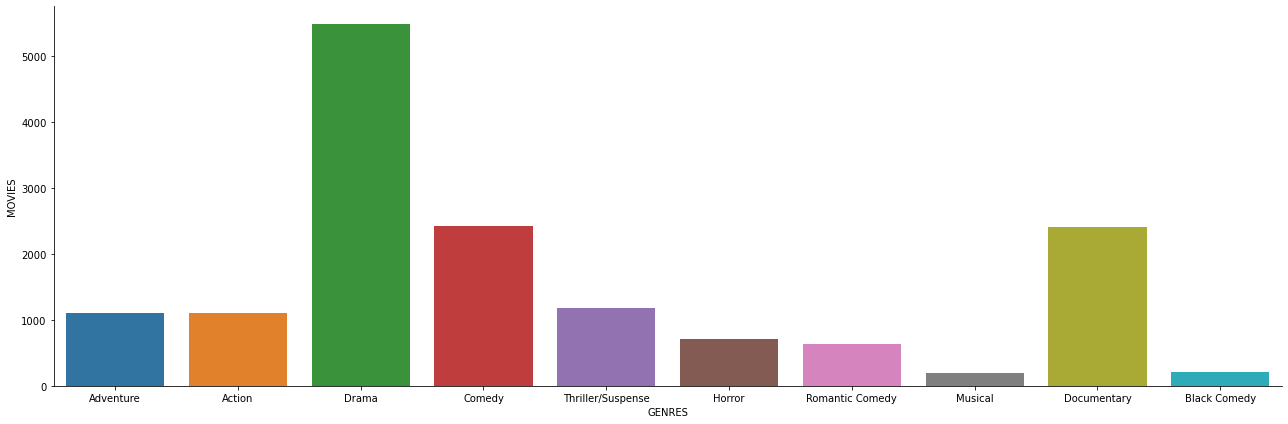

In [158]:
#Genres vs Number of movies released
fig=plt.figure(figsize=(5,10))
ax = sns.catplot(y='MOVIES', x='GENRES',kind='bar', data=TopGenres, height=6, aspect=3)
plt.ylabel('MOVIES')
plt.xlabel('GENRES')

We can observe that the most number of movies are released on drama genre.

Text(0.5, 6.800000000000011, 'GENRES')

<Figure size 360x720 with 0 Axes>

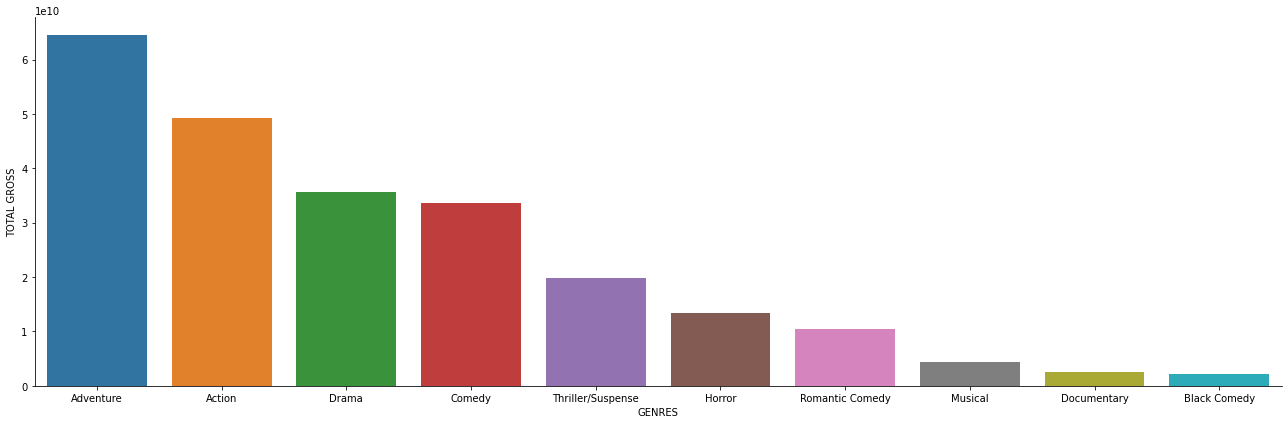

In [159]:
#Genres vs Total Gross
fig=plt.figure(figsize=(5,10))
ax = sns.catplot(y='TOTAL GROSS', x='GENRES',kind='bar', data=TopGenres, height=6, aspect=3)
plt.ylabel('TOTAL GROSS')
plt.xlabel('GENRES')

However, we can observe that the most total gross was gained from Adventure Genre

### Top Grossing Ratings Analysis

In [160]:
TopGrossingRatings = pd.read_csv('Datasets/TopGrossingRatings.csv')
TopGrossingRatings

,RANK,MPAA RATINGS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,PG-13,"3,243","$113,524,789,243","$35,006,102",47.75%
1,2,R,"5,480","$63,497,164,978","$11,587,074",26.71%
2,3,PG,"1,535","$49,124,317,794","$32,002,813",20.66%
3,4,G,395,"$9,572,240,391","$24,233,520",4.03%
4,5,Not Rated,"5,820","$1,918,358,283","$329,615",0.81%
5,6,NC-17,24,"$44,850,139","$1,868,756",0.02%
6,7,Open,5,"$5,489,687","$1,097,937",0.00%
7,8,GP,7,"$552,618","$78,945",0.00%


In [161]:
TopGrossingRatings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RANK           8 non-null      int64 
 1   MPAA RATINGS   8 non-null      object
 2   MOVIES         8 non-null      object
 3   TOTAL GROSS    8 non-null      object
 4   AVERAGE GROSS  8 non-null      object
 5   MARKET SHARE   8 non-null      object
dtypes: int64(1), object(5)
memory usage: 512.0+ bytes


In [162]:
# data cleaning
#Converting TOTAL GROSS from object to int
TopGrossingRatings['TOTAL GROSS']=TopGrossingRatings['TOTAL GROSS'].replace(',','', regex=True)
TopGrossingRatings['TOTAL GROSS']=TopGrossingRatings['TOTAL GROSS'].str.replace('$','', regex=True)
TopGrossingRatings['TOTAL GROSS']=pd.to_numeric(TopGrossingRatings['TOTAL GROSS'])

#Converting AVERAGE GROSS from object to int
TopGrossingRatings['AVERAGE GROSS']=TopGrossingRatings['AVERAGE GROSS'].replace(',','', regex=True)
TopGrossingRatings['AVERAGE GROSS']=TopGrossingRatings['AVERAGE GROSS'].str.replace('$','', regex=True)
TopGrossingRatings['AVERAGE GROSS']=pd.to_numeric(TopGrossingRatings['AVERAGE GROSS'])

#Converting AVERAGE GROSS from object to int
TopGrossingRatings['MOVIES']=TopGrossingRatings['MOVIES'].replace(',','', regex=True)
TopGrossingRatings['MOVIES']=TopGrossingRatings['MOVIES'].str.replace('$','', regex=True)
TopGrossingRatings['MOVIES']=pd.to_numeric(TopGrossingRatings['MOVIES'])

TopGrossingRatings

,RANK,MPAA RATINGS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,PG-13,3243,113524789243,35006102,47.75%
1,2,R,5480,63497164978,11587074,26.71%
2,3,PG,1535,49124317794,32002813,20.66%
3,4,G,395,9572240391,24233520,4.03%
4,5,Not Rated,5820,1918358283,329615,0.81%
5,6,NC-17,24,44850139,1868756,0.02%
6,7,Open,5,5489687,1097937,0.00%
7,8,GP,7,552618,78945,0.00%


Text(0.5, 6.800000000000011, 'MPAA RATINGS')

<Figure size 360x720 with 0 Axes>

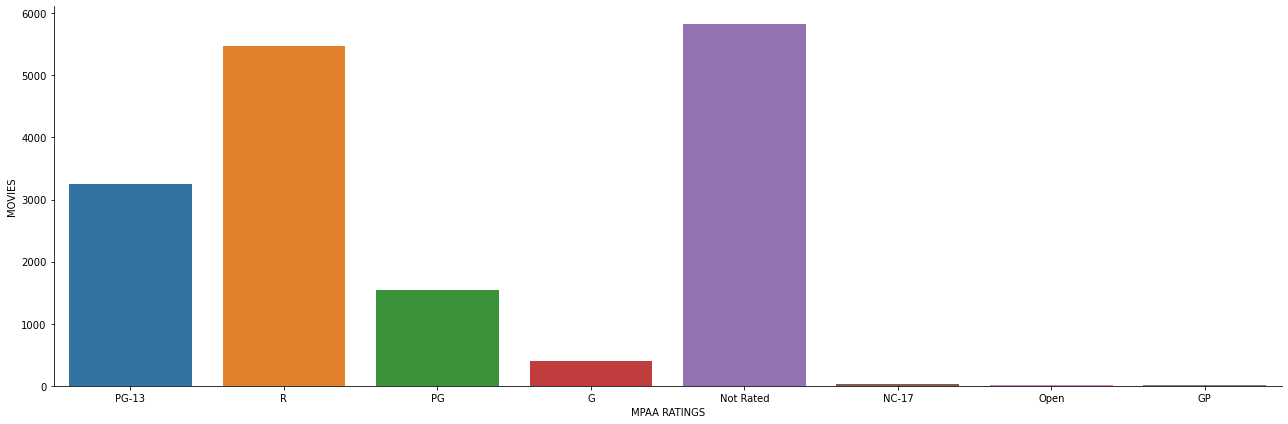

In [163]:
#Genres vs Number of movies released
fig=plt.figure(figsize=(5,10))
ax = sns.catplot(y='MOVIES', x='MPAA RATINGS',kind='bar', data=TopGrossingRatings, height=6, aspect=3)
plt.ylabel('MOVIES')
plt.xlabel('MPAA RATINGS')

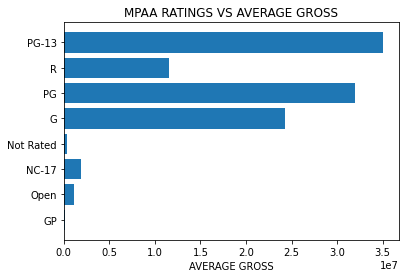

In [164]:
# Bar plot for MPAA Rating and Average Gross
fig, ax = plt.subplots()
ax.barh(TopGrossingRatings['MPAA RATINGS'], TopGrossingRatings['AVERAGE GROSS'], align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('AVERAGE GROSS')
ax.set_title('MPAA RATINGS VS AVERAGE GROSS')
plt.show()

### Top Grossing Sources Analysis

In [165]:
TopGrossingSources = pd.read_csv('Datasets/TopGrossingSources.csv')
TopGrossingSources

,RANK,SOURCES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Original Screenplay,"7,946","$106,375,196,782","$13,387,264",44.74%
1,2,Based on Fiction Book/Short Story,"2,150","$47,005,613,207","$21,863,076",19.77%
2,3,Based on Comic/Graphic Novel,249,"$23,369,989,130","$93,855,378",9.83%
3,4,Remake,328,"$12,832,659,970","$39,123,963",5.40%
4,5,Based on Real Life Events,"3,225","$11,398,356,297","$3,534,374",4.79%
5,6,Based on TV,231,"$11,305,006,312","$48,939,421",4.75%
6,7,Based on Factual Book/Article,295,"$7,443,681,990","$25,232,820",3.13%
7,8,Spin-Off,41,"$3,833,128,331","$93,490,935",1.61%
8,9,Based on Folk Tale/Legend/Fairytale,78,"$3,406,118,495","$43,668,186",1.43%
9,10,Based on Play,271,"$2,111,190,923","$7,790,372",0.89%


In [166]:
TopGrossingRatings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RANK           8 non-null      int64 
 1   MPAA RATINGS   8 non-null      object
 2   MOVIES         8 non-null      int64 
 3   TOTAL GROSS    8 non-null      int64 
 4   AVERAGE GROSS  8 non-null      int64 
 5   MARKET SHARE   8 non-null      object
dtypes: int64(4), object(2)
memory usage: 512.0+ bytes


In [167]:
# data cleaning
#Converting TOTAL GROSS from object to int
TopGrossingSources['TOTAL GROSS']=TopGrossingSources['TOTAL GROSS'].replace(',','', regex=True)
TopGrossingSources['TOTAL GROSS']=TopGrossingSources['TOTAL GROSS'].str.replace('$','', regex=True)
TopGrossingSources['TOTAL GROSS']=pd.to_numeric(TopGrossingSources['TOTAL GROSS'])

#Converting AVERAGE GROSS from object to int
TopGrossingSources['AVERAGE GROSS']=TopGrossingSources['AVERAGE GROSS'].replace(',','', regex=True)
TopGrossingSources['AVERAGE GROSS']=TopGrossingSources['AVERAGE GROSS'].str.replace('$','', regex=True)
TopGrossingSources['AVERAGE GROSS']=pd.to_numeric(TopGrossingSources['AVERAGE GROSS'])

#Converting AVERAGE GROSS from object to int
TopGrossingSources['MOVIES']=TopGrossingSources['MOVIES'].replace(',','', regex=True)
TopGrossingSources['MOVIES']=TopGrossingSources['MOVIES'].str.replace('$','', regex=True)
TopGrossingSources['MOVIES']=pd.to_numeric(TopGrossingSources['MOVIES'])

TopGrossingSources

,RANK,SOURCES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Original Screenplay,7946,106375196782,13387264,44.74%
1,2,Based on Fiction Book/Short Story,2150,47005613207,21863076,19.77%
2,3,Based on Comic/Graphic Novel,249,23369989130,93855378,9.83%
3,4,Remake,328,12832659970,39123963,5.40%
4,5,Based on Real Life Events,3225,11398356297,3534374,4.79%
5,6,Based on TV,231,11305006312,48939421,4.75%
6,7,Based on Factual Book/Article,295,7443681990,25232820,3.13%
7,8,Spin-Off,41,3833128331,93490935,1.61%
8,9,Based on Folk Tale/Legend/Fairytale,78,3406118495,43668186,1.43%
9,10,Based on Play,271,2111190923,7790372,0.89%


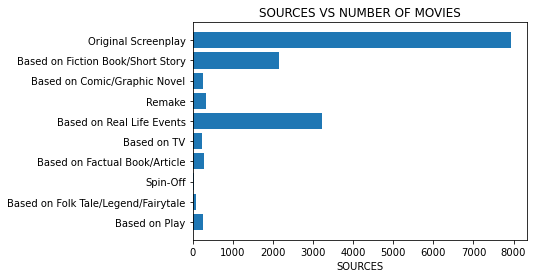

In [168]:
# Bar plot for Sources and Number of Movies
fig, ax = plt.subplots()
ax.barh(TopGrossingSources['SOURCES'], TopGrossingSources['MOVIES'], align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('SOURCES')
ax.set_title('SOURCES VS NUMBER OF MOVIES')
plt.show()

### Top Production Methods Analysis

In [169]:
 TopProductionMethods = pd.read_csv('Datasets/TopProductionMethods.csv')
 TopProductionMethods

,RANK,PRODUCTION METHODS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Live Action,"14,613","$179,637,201,848","$12,292,972",75.56%
1,2,Animation/Live Action,264,"$30,346,622,254","$114,949,327",12.76%
2,3,Digital Animation,365,"$23,920,180,508","$65,534,741",10.06%
3,4,Hand Animation,164,"$2,960,497,487","$18,051,814",1.25%
4,5,Stop-Motion Animation,37,"$676,490,120","$18,283,517",0.28%
5,6,Multiple Production Methods,26,"$43,728,300","$1,681,858",0.02%
6,7,Rotoscoping,4,"$8,468,385","$2,117,096",0.00%


In [170]:
# data cleaning
#Converting TOTAL GROSS from object to int
TopProductionMethods['TOTAL GROSS']=TopProductionMethods['TOTAL GROSS'].replace(',','', regex=True)
TopProductionMethods['TOTAL GROSS']=TopProductionMethods['TOTAL GROSS'].str.replace('$','', regex=True)
TopProductionMethods['TOTAL GROSS']=pd.to_numeric(TopProductionMethods['TOTAL GROSS'])

#Converting AVERAGE GROSS from object to int
TopProductionMethods['AVERAGE GROSS']=TopProductionMethods['AVERAGE GROSS'].replace(',','', regex=True)
TopProductionMethods['AVERAGE GROSS']=TopProductionMethods['AVERAGE GROSS'].str.replace('$','', regex=True)
TopProductionMethods['AVERAGE GROSS']=pd.to_numeric(TopProductionMethods['AVERAGE GROSS'])

#Converting AVERAGE GROSS from object to int
TopProductionMethods['MOVIES']=TopProductionMethods['MOVIES'].replace(',','', regex=True)
TopProductionMethods['MOVIES']=TopProductionMethods['MOVIES'].str.replace('$','', regex=True)
TopProductionMethods['MOVIES']=pd.to_numeric(TopProductionMethods['MOVIES'])

TopProductionMethods

,RANK,PRODUCTION METHODS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Live Action,14613,179637201848,12292972,75.56%
1,2,Animation/Live Action,264,30346622254,114949327,12.76%
2,3,Digital Animation,365,23920180508,65534741,10.06%
3,4,Hand Animation,164,2960497487,18051814,1.25%
4,5,Stop-Motion Animation,37,676490120,18283517,0.28%
5,6,Multiple Production Methods,26,43728300,1681858,0.02%
6,7,Rotoscoping,4,8468385,2117096,0.00%


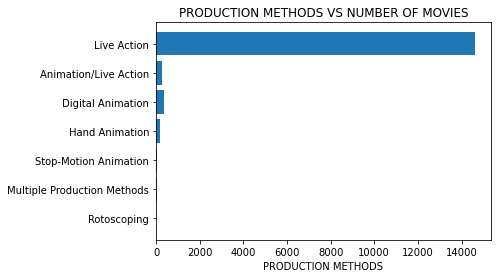

In [171]:
# Bar plot for Production Methods and Number of Movies
fig, ax = plt.subplots()
ax.barh(TopProductionMethods['PRODUCTION METHODS'], TopProductionMethods['MOVIES'], align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('PRODUCTION METHODS')
ax.set_title('PRODUCTION METHODS VS NUMBER OF MOVIES')
plt.show()

We can observe that the most of the movies were made from Live Action.

### Wide Releases Count Analysis

In [172]:
WideReleasesCount = pd.read_csv('Datasets/WideReleasesCount.csv')
WideReleasesCount

,YEAR,WARNER BROS,WALT DISNEY,20TH CENTURY FOX,PARAMOUNT PICTURES,SONY PICTURES,UNIVERSAL,TOTAL MAJOR 6,TOTAL OTHER STUDIOS,Unnamed: 9
0,2021,17,7,0,4,16,17,61,38,NaN
1,2020,5,3,1,3,9,13,34,23,NaN
2,2019,18,10,11,9,18,21,87,44,NaN
3,2018,19,10,11,10,16,20,86,58,NaN
4,2017,18,8,14,10,16,15,81,50,NaN
5,2016,17,12,16,12,16,22,95,46,NaN
6,2015,22,11,18,9,13,20,93,33,NaN
7,2014,17,12,17,10,17,15,88,37,NaN
8,2013,17,8,15,8,14,16,78,42,NaN
9,2012,16,11,15,13,18,17,90,42,NaN


In [173]:
# drop unnecassary column
WideReleasesCount = WideReleasesCount.drop(['Unnamed: 9'], axis=1)
WideReleasesCount

,YEAR,WARNER BROS,WALT DISNEY,20TH CENTURY FOX,PARAMOUNT PICTURES,SONY PICTURES,UNIVERSAL,TOTAL MAJOR 6,TOTAL OTHER STUDIOS
0,2021,17,7,0,4,16,17,61,38
1,2020,5,3,1,3,9,13,34,23
2,2019,18,10,11,9,18,21,87,44
3,2018,19,10,11,10,16,20,86,58
4,2017,18,8,14,10,16,15,81,50
5,2016,17,12,16,12,16,22,95,46
6,2015,22,11,18,9,13,20,93,33
7,2014,17,12,17,10,17,15,88,37
8,2013,17,8,15,8,14,16,78,42
9,2012,16,11,15,13,18,17,90,42


In [174]:
WideReleasesCount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   YEAR                 27 non-null     int64
 1   WARNER BROS          27 non-null     int64
 2   WALT DISNEY          27 non-null     int64
 3   20TH CENTURY FOX     27 non-null     int64
 4   PARAMOUNT PICTURES   27 non-null     int64
 5   SONY PICTURES        27 non-null     int64
 6   UNIVERSAL            27 non-null     int64
 7   TOTAL MAJOR 6        27 non-null     int64
 8   TOTAL OTHER STUDIOS  27 non-null     int64
dtypes: int64(9)
memory usage: 2.0 KB


In [175]:
#Comparison of Total movies released from 6 major production from 1995 to 2021

# drop  unnecessary columns for now
WideReleasesCount = WideReleasesCount.drop(['TOTAL MAJOR 6',  'TOTAL OTHER STUDIOS', 'YEAR'], axis=1)
WideReleasesCount


,WARNER BROS,WALT DISNEY,20TH CENTURY FOX,PARAMOUNT PICTURES,SONY PICTURES,UNIVERSAL
0,17,7,0,4,16,17
1,5,3,1,3,9,13
2,18,10,11,9,18,21
3,19,10,11,10,16,20
4,18,8,14,10,16,15
5,17,12,16,12,16,22
6,22,11,18,9,13,20
7,17,12,17,10,17,15
8,17,8,15,8,14,16
9,16,11,15,13,18,17


In [176]:
WideReleasesCount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   WARNER BROS         27 non-null     int64
 1   WALT DISNEY         27 non-null     int64
 2   20TH CENTURY FOX    27 non-null     int64
 3   PARAMOUNT PICTURES  27 non-null     int64
 4   SONY PICTURES       27 non-null     int64
 5   UNIVERSAL           27 non-null     int64
dtypes: int64(6)
memory usage: 1.4 KB


<AxesSubplot:>

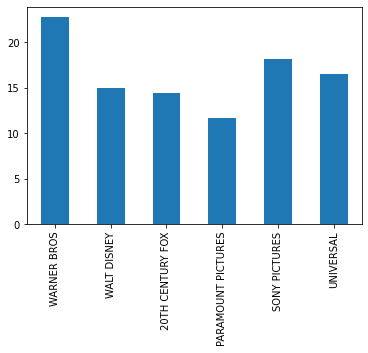

In [177]:
k = WideReleasesCount.sum()/len(WideReleasesCount)
k.plot.bar()

We can see that Warner Bros and Sony Pictures are the top 2 production, made the most number of movies from 1995 to 2021.

In [178]:
# Reset our dataframe 
WideReleasesCount = pd.read_csv('Datasets/WideReleasesCount.csv')
WideReleasesCount = WideReleasesCount.drop(['Unnamed: 9'], axis=1)
WideReleasesCount

,YEAR,WARNER BROS,WALT DISNEY,20TH CENTURY FOX,PARAMOUNT PICTURES,SONY PICTURES,UNIVERSAL,TOTAL MAJOR 6,TOTAL OTHER STUDIOS
0,2021,17,7,0,4,16,17,61,38
1,2020,5,3,1,3,9,13,34,23
2,2019,18,10,11,9,18,21,87,44
3,2018,19,10,11,10,16,20,86,58
4,2017,18,8,14,10,16,15,81,50
5,2016,17,12,16,12,16,22,95,46
6,2015,22,11,18,9,13,20,93,33
7,2014,17,12,17,10,17,15,88,37
8,2013,17,8,15,8,14,16,78,42
9,2012,16,11,15,13,18,17,90,42


Text(0.5, 1.0, 'TOTAL NUMBER OF MOVIES RELEASED BY 6 MAJOR PRODUCTION FROM 1995 RO 2021')

<Figure size 360x720 with 0 Axes>

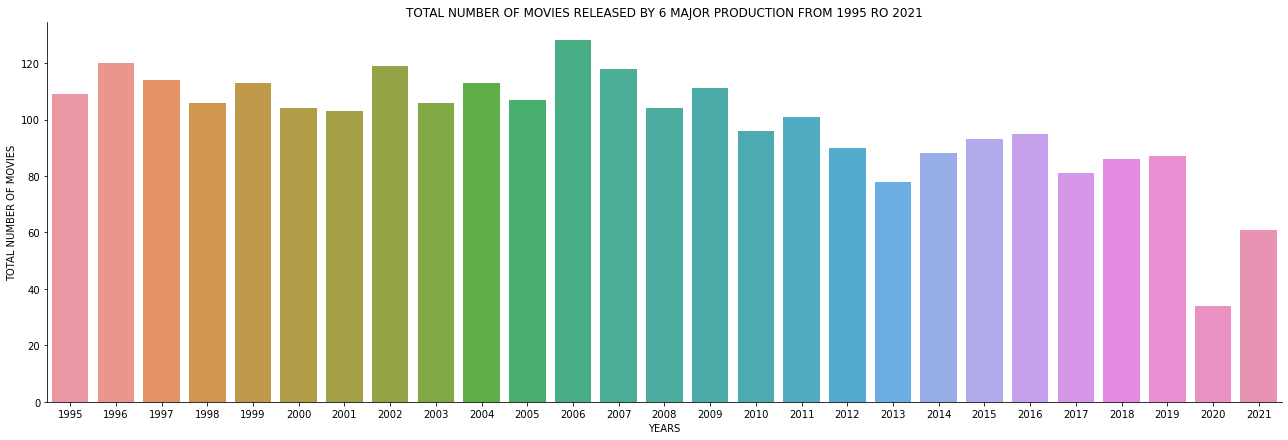

In [179]:
#Let see the trendline of total movies released by 6 major production from 1995 to 2021
fig=plt.figure(figsize=(5,10))
ax = sns.catplot(y='TOTAL MAJOR 6', x='YEAR',kind='bar', data=WideReleasesCount, height=6, aspect=3)
plt.ylabel('TOTAL NUMBER OF MOVIES')
plt.xlabel('YEARS')
plt.title('TOTAL NUMBER OF MOVIES RELEASED BY 6 MAJOR PRODUCTION FROM 1995 RO 2021')

From the bar plot above we can observe a slight decrease in the number  of movies avter 2007 which is the highest number of movies released.

## Thanks  for reading, please rate if you liked my analysis